<p>&nbsp;</p>

## **Lab 1**

<p>&nbsp;</p>

<font size = "5">

Syracuse University  
IST 718 Big Data Analytics  
Spring 2022

<p>&nbsp;</p>

## **Introduction**

<p>&nbsp;</p>

<font size = "5">

Colleges operate on tight budgets so they are always looking for opportunities to cut cost. There is a balancing act because they need to carefully decide where to allocate their money. Spending too much money in one area might mean that another area is not getting enough money and vice versa. Football programs, being that they are usually the dominant sport at most schools, are notorious for consuming a lot of resources. In this report, I will be analyzing data related to football head coach salaries at division I colleges. Which coaches are overpaid and which coaches are undepraid? What are the most important variables that should be considered when deciding coach pay? These are the type of questions that I hope to answer.

<p>&nbsp;</p>

In [2]:
# Import packages
import re
import bs4
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain
import numpy as np
from scipy.stats import uniform
import statsmodels.api as sm
import statsmodels.formula.api as smf

<p>&nbsp;</p>

## **Data Collection**

<p>&nbsp;</p>

<font size = "5">

The "Coaches" dataset is the main dataset that I will build off. The columns are "School", "Conference", "Coach", "SchoolPay", "TotalPay", "Bonus", "BonusPaid", "AssistantPay", and "Buyout", but I will only be using the "School", "Conference", "Coach", and "SchoolPay" columns. This dataset is available on the IST 718 course github page. In addition to the "Coaches" dataset, I will obtain additional data from the web. I will start off by obtaining the "Coaches" dataset and performing some initial scrubbing and exploring before gathering additional data and merging them together.

<p>&nbsp;</p>

In [3]:
# Obtain the "Coaches" dataset from the IST 718 github page
Coaches = pd.read_csv("https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv")

In [4]:
# How many rows and columns does the "Coaches" dataset have?
print(Coaches.shape)

(129, 9)


In [5]:
# Take a look at the first 10 rows in the "Coaches" dataset
Coaches.head(10)

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
5,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000"
6,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667"
7,Arkansas,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000"
8,Arkansas State,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000"
9,Army,Ind.,Jeff Monken,932521,932521,--,--,$0,--


In [6]:
# Show the data types for each column
Coaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School        129 non-null    object
 1   Conference    129 non-null    object
 2   Coach         129 non-null    object
 3   SchoolPay     129 non-null    object
 4   TotalPay      129 non-null    object
 5   Bonus         129 non-null    object
 6   BonusPaid     129 non-null    object
 7   AssistantPay  129 non-null    object
 8   Buyout        129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


<p>&nbsp;</p>

<font size = "5">

Based on the initial checks of the data, it is apparent that some preprocessing needs to be done. The "SchoolPay", "TotalPay", "Bonus", "BonusPaid", "AssistantPay", and "Buyout" columns should be a numeric data type but they were interpreted as strings because they contain non numeric characters such as dollar signs and commas. But out of these columns I only need to keep the "SchoolPay" column as this will be the dependent variable, so I will remove the others. Then in order to convert the "SchoolPay" column to numeric, I will define a function that removes non numeric characters from a string, and apply the function to the "SchoolPay" column by using the pandas dataframe "apply" function.

There are also some missing values in the dataset, but instead of showing up as nulls like missing values usually do, these values are showing up as "--". These will be turned to NaNs as a result of the conversion function. This is because the function will remove both of the hyphens, leaving just an empty character string, try to convert that to a number, which will throw an error, and that triggers the except statement, which will return a value of None. For right now, I will not do anything with these missing values, but I will handle them later on.

<p>&nbsp;</p>

In [7]:
# Keep only the "School", "Conference", "Coach", and "SchoolPay" columns from the "Coaches" dataframe
Coaches = Coaches.loc[:, ["School", "Conference", "Coach", "SchoolPay"]]

In [8]:
# Define a function for removing non numeric characters from a string and converting it to numeric
def convert_string_to_numeric(string):

    """
    This function takes in a string, uses regex to extract any numeric values, and then attempts
    to convert it to a "float" data type. If there is an error when converting it will return a
    value of None.
    """

    try: return float("".join(re.findall("[0-9]", string)))
    except: return None

In [9]:
# Apply the function to the "SchoolPay" column
Coaches["SchoolPay"] = Coaches["SchoolPay"].apply(convert_string_to_numeric)

In [10]:
# Take another look at the first 10 rows in the "Coaches" dataframe
Coaches.head(10)

,School,Conference,Coach,SchoolPay
0,Air Force,Mt. West,Troy Calhoun,885000.0
1,Akron,MAC,Terry Bowden,411000.0
2,Alabama,SEC,Nick Saban,8307000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0
5,Arizona,Pac-12,Kevin Sumlin,1600000.0
6,Arizona State,Pac-12,Herm Edwards,2000000.0
7,Arkansas,SEC,Chad Morris,3500000.0
8,Arkansas State,Sun Belt,Blake Anderson,825000.0
9,Army,Ind.,Jeff Monken,932521.0


In [11]:
# Show the data types for each column again for good measure
Coaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   School      129 non-null    object 
 1   Conference  129 non-null    object 
 2   Coach       129 non-null    object 
 3   SchoolPay   125 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.2+ KB


<p>&nbsp;</p>

<font size = "5">

In the next bit of code, I will use a combination of the pandas read_html function and the bs4 library to do web scraping. More specifically, I will be gathering win / loss percentages, conference champions, and coach of the year awards from https://www.sports-reference.com/. While these are just a few features among a vast collection of data that is available on this site, I thought that they would be among the most interesting. I would anticipate all 3 of these features to have a positive correlation "SchoolPay". They are also likely to be correlated with eachother, which could be problematic in a linear model, but at the same time they have some independence of eachother. For example, a school could have a really good win / loss percentage but not win the championship. Or a school could win a championship without the coach receiving a coach of the year award. I will take a closer look at this later on.

<p>&nbsp;</p>

In [12]:
# Create a function for forming a dynamic sports reference cfb year summary URL based on a given year
def form_sports_reference_cfb_year_summary_url(year):

    """
    This function takes in a year as an argument and returns a sports reference cfb year summary URL for that
    year. For example, the URL for the year 2010 would be "https://www.sports-reference.com/cfb/years/2010.html".
    This web page contains the "Conference Summary" and "Award Winners" tables.
    """

    return "https://www.sports-reference.com/cfb/years/" + str(year) + ".html"

In [13]:
# Create a function for scraping a list of conference champions from a given sports reference cfb year summary URL
def get_conference_champs(sports_reference_cfb_year_summary_url):

    """
    This function takes in a sports reference cfg year summary URL and uses the pandas read_html function to read the
    tables on the page which returns a list of the tables. There are 2 tables on this page, the "Conference Summary"
    and "Award Winners" tables, so the list has 2 elements. The first element is indexed which is the "Conference Summary"
    table, and the last column in the "Conference Summary" table is indexed, which is the "Champion" column, which is
    converted to a list and returned as the function output.
    """
    
    return list(pd.read_html(sports_reference_cfb_year_summary_url)[0].iloc[:, -1])

In [14]:
# Create a function for scraping a list of award winners from a given sports reference cfg year summary URL
def get_coach_of_the_year_awards(sports_reference_cfb_year_summary_url):

    """
    This function takes in a sports reference cfg year summary URL and uses the pandas read_html function to read the
    tables on the page which returns a list of the tables. There are 2 tables on this page, the "Conference Summary"
    and "Award Winners" tables, so the list has 2 elements. The second element is indexed which is the "Award winners"
    table, then the "Award" column is filtered on only on the coach of the year awards, and then the "Name" column is
    indexed, which is the coaches name, which is converted to a list and returned as the function output.
    """

    awards = pd.read_html(sports_reference_cfb_year_summary_url)[1]
    return list(awards.loc[["coach of the year award" in x.lower() for x in awards["Award"]], ["Name"]].Name)

In [15]:
# Create a function for scraping a list of links to the conference pages for a given sports reference cfg year summary URL
def get_conference_links(sports_reference_cfb_year_summary_url):

    """
    This function takes in a sports reference cfg year summary URL and uses the requests and bs4 libraries to parse the
    HTML. In the "Conference Summary" table, the "Conference" column contains the 12 conferences that make up NCAA
    division I. There are URLs to a web page for each conference that contains more detailed information about that
    conference for that year. This function scrapes each of these URLs into a list and returns the list as the function
    output.
    """

    # Establish a connection to the web page using the requests library
    page = requests.get(sports_reference_cfb_year_summary_url)

    # Parse the HTML of the web page using the bs4 library
    soup = bs4.BeautifulSoup(page.text, "html.parser")

    # Find the "Conferences" table and save the HTML for that table
    table = soup.find_all("table", attrs = {"id": "conferences"})[0]


    # Scrape each of the URLs for the conference details into a list
    conf = []                                                          # Start an empty list to save the links in
    tbody = table.find_all("tbody")[0]                                 # Get everything in the tbody tag of the "Conferences" table
    for tr in tbody.find_all("tr"):                                    # Iterate through each tr tag in the tbody tag
        for td in tr.find_all(attrs = {"data-stat": "conf_name"}):     # Iterate through each td tag in the tr tag
            for a in td.find_all("a"):                                 # Iterage through each a tag in the td tag
                link = a.get("href")                                   # Get out the href from the a tag
                conf.append(link)                                      # Append the href to the conf list

    # Return the conf list with the root URL included
    return ["https://www.sports-reference.com" + c for c in conf]

In [16]:
# Create a function for scraping a dataframe of win / loss percentages from a given sports reference conference details URL
def get_win_loss_percentages(sports_reference_conference_details_url):

    """
    This function takes in a sports reference conference details URL and uses the pandas read_html function to read the
    tables on the page which returns a list of the tables. There are several tables on this page, but the first one is the
    "Standings" table. This function reads in the "Standings" table, changes the column headers so that they are the
    concatenation of both lines in the multiline column header (this is necessary otherwise not all of the columns have
    unique names, for example there are two columns named "W" and two columns named "L", one for the school overall record
    and the other for the school conference record, and the first line in the multiline header differentiates them). It
    then returns a dataframe consisting of the "School" and the "OverallPct" columns. The "OverallPct" column is the overall
    win / loss percentage for a school over the entire season.
    """

    standings = pd.read_html(sports_reference_conference_details_url)[0]
    standings.columns = [x + y for x, y in standings.columns]
    winloss = pd.concat([standings.iloc[:, 0], standings.loc[:, "OverallPct"]], axis = 1)
    winloss.columns = ["School", "OverallPct"]
    return winloss

In [17]:
# Iterate through each year from 2010 through 2020 and collect the conference champions
ChampsList = []
for year in list(range(2010, 2021)):
    URL = form_sports_reference_cfb_year_summary_url(year)
    ChampsList.append(get_conference_champs(URL))
ChampsList = list(chain.from_iterable(ChampsList))  # Flatten the nested list into a flat list
print(ChampsList)

['Oregon', 'Auburn', 'Oklahoma', 'Virginia Tech', 'Michigan State, Ohio State, Wisconsin', nan, 'Connecticut, Pitt, West Virginia', 'Boise State, Hawaii, Nevada', 'Texas Christian', 'UCF', 'Miami (OH)', 'Florida International, Troy', 'Oklahoma State', 'LSU', 'Wisconsin', 'Oregon', 'Cincinnati, Louisville, West Virginia', 'Clemson', nan, 'Texas Christian', 'Northern Illinois', 'Southern Mississippi', 'Louisiana Tech', 'Arkansas State', 'Alabama', 'Kansas State, Oklahoma', 'Stanford', 'Wisconsin', nan, 'Florida State', 'Cincinnati, Louisville, Rutgers, Syracuse', 'Utah State', 'Arkansas State', 'Boise State, Fresno State, San Diego State', 'Tulsa', 'Northern Illinois', 'Stanford', 'Auburn', 'Baylor', 'Michigan State', 'Florida State', 'UCF', 'Fresno State', nan, 'Arkansas State, Louisiana', 'Rice', 'Bowling Green State', 'Alabama', 'Oregon', 'Florida State', 'Baylor, Texas Christian', 'Ohio State', nan, 'Boise State', 'Marshall', 'UCF, Cincinnati, Memphis', 'Northern Illinois', 'Georgia 

In [18]:
# Add the number of conference championships that each school has gotten as a new column in the "Coaches" dataframe
Championships = []
for school1 in Coaches["School"]:
    count = 0
    for school2 in ChampsList:
        try:
            if school1 in school2:
                count += 1
        except:
            count += 0
    Championships.append(count)
Coaches["Championships"] = Championships

In [19]:
# Print out the 10 schools with the most championships
Coaches.sort_values(by = ["Championships"], ascending = False).loc[:, ["School", "Championships"]].head(10)

,School,Championships
83,Oklahoma,9
23,Clemson,7
2,Alabama,6
82,Ohio State,6
81,Ohio,6
31,Florida,6
13,Boise State,5
86,Oregon,5
7,Arkansas,5
8,Arkansas State,5


In [20]:
# Iterate through each year from 2010 through 2020 and collect the coach of the year awards
AwardsList = []
for year in list(range(2010, 2021)):
    URL = form_sports_reference_cfb_year_summary_url(year)
    AwardsList.append(get_coach_of_the_year_awards(URL))
AwardsList = list(chain.from_iterable(AwardsList))  # Flatten the nested list into a flat list
print(AwardsList)

['Chip Kelly', 'Chip Kelly', 'Chip Kelly', 'Gene Chizik', 'Gene Chizik', 'Chip Kelly', 'Les Miles', 'Les Miles', 'Mike Gundy', 'Les Miles', 'Mike Gundy', 'Les Miles', 'Brian Kelly', 'Brian Kelly', 'Brian Kelly', 'Brian Kelly', 'Brian Kelly', 'Brian Kelly', 'David Cutcliffe', 'Gus Malzahn', 'Gus Malzahn', 'Gus Malzahn', 'Gus Malzahn', 'David Cutcliffe', 'Gary Patterson', 'Gary Patterson', 'Gary Patterson', 'Gary Patterson', 'Gary Patterson', 'Gary Patterson', 'Dabo Swinney', 'Dabo Swinney', 'Kirk Ferentz', 'Dabo Swinney', 'Dabo Swinney', 'Dabo Swinney', 'Mike MacIntyre', 'Mike MacIntyre', 'Mike MacIntyre', 'Mike MacIntyre', 'Dabo Swinney', 'Mike MacIntyre', 'Scott Frost', 'Scott Frost', 'Scott Frost', 'Scott Frost', 'Scott Frost', 'Mark Richt', 'Mike Leach', 'Brian Kelly', 'Bill Clark', 'Brian Kelly', 'Dabo Swinney', 'Nick Saban', 'Ed Orgeron', 'Ed Orgeron', 'Ed Orgeron', 'Ed Orgeron', 'Ed Orgeron', 'Ed Orgeron', 'Tom Allen', 'Jamey Chadwell', 'Jamey Chadwell', 'Jamey Chadwell', 'Nick S

In [21]:
# Add the number of coach of the year awards that each coach has won as a new column in the "Coaches" dataframe
CoachOfTheYearAwards = []
for coach1 in Coaches["Coach"]:
    count = 0
    for coach2 in AwardsList:
        try:
            if coach1 in coach2:
                count += 1
        except:
            count += 0
    CoachOfTheYearAwards.append(count)
Coaches["CoachOfTheYearAwards"] = CoachOfTheYearAwards

In [22]:
# Print out the 10 coaches with the most coach of the year awards
Coaches.sort_values(by = ["CoachOfTheYearAwards"], ascending = False).loc[:, ["Coach", "CoachOfTheYearAwards"]].head(10)

,Coach,CoachOfTheYearAwards
80,Brian Kelly,8
23,Dabo Swinney,7
106,Gary Patterson,6
55,Ed Orgeron,6
70,Scott Frost,5
25,Mike MacIntyre,5
10,Gus Malzahn,4
115,Chip Kelly,4
84,Mike Gundy,2
2,Nick Saban,2


In [23]:
# Iterate through each year from 2010 through 2020 and collect the win / loss percentages
# The win / loss percentages will be aggregated into one average win / loss percentage
WinLoss = pd.DataFrame(columns = ["School", "OverallPct"])
for year in list(range(2010, 2021)):
    URL = form_sports_reference_cfb_year_summary_url(year)
    ConfLinks = get_conference_links(URL)
    for link in ConfLinks:
        WinLoss = pd.concat([WinLoss, get_win_loss_percentages(link)], axis = 0)
    print("Year Complete: ", year)

Year Complete:  2010
Year Complete:  2011
Year Complete:  2012
Year Complete:  2013
Year Complete:  2014
Year Complete:  2015
Year Complete:  2016
Year Complete:  2017
Year Complete:  2018
Year Complete:  2019
Year Complete:  2020


In [24]:
# Show the WinLoss dataframe
WinLoss

,School,OverallPct
0,Oregon,0.923
1,Stanford,0.923
2,USC,0.615
3,Washington,0.538
4,Arizona,0.538
...,...,...
10,Louisiana Tech,.500
11,North Texas,.400
12,Rice,.400
13,Southern Mississippi,.300


In [25]:
# Show the data types of the WinLoss dataframe
WinLoss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   School      1475 non-null   object
 1   OverallPct  1473 non-null   object
dtypes: object(2)
memory usage: 34.6+ KB


In [26]:
# Convert the OverallPct column to a float
WinLoss = WinLoss.loc[["pct" not in str(x).lower() for x in WinLoss["OverallPct"]], :]
WinLoss["OverallPct"] = WinLoss["OverallPct"].astype(dtype = float, copy = False)

C:\Users\lilgi\AppData\Local\Temp/ipykernel_5468/1418053224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WinLoss["OverallPct"] = WinLoss["OverallPct"].astype(dtype = float, copy = False)


In [27]:
# Check the data types again after converting
WinLoss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   School      1393 non-null   object 
 1   OverallPct  1391 non-null   float64
dtypes: float64(1), object(1)
memory usage: 32.6+ KB


In [28]:
# Aggregate the dataframe by school and average win / loss percentages
WinLoss = WinLoss.groupby(["School"]).mean()

In [29]:
# Print out the top 10 best average win / loss percentages
WinLoss.sort_values(by = ["OverallPct"], ascending = False).head(10)

,OverallPct
School,
Alabama,0.899818
Ohio State,0.866727
Clemson,0.829636
Oklahoma,0.812455
Boise State,0.795545
Appalachian State,0.773571
LSU,0.755091
Georgia,0.737364
Oregon,0.736273


In [30]:
# Print out the top 10 worst average win / loss percentages
WinLoss.sort_values(by = ["OverallPct"], ascending = True).head(10)

,OverallPct
School,
Kansas,0.159091
Massachusetts,0.175778
Nevada-Las Vegas,0.257545
New Mexico State,0.258818
Idaho,0.280500
Akron,0.283182
UTEP,0.284091
New Mexico,0.294545
Texas State,0.296333


In [31]:
# Join the win / loss percentages into the "Coaches" dataframe
Coaches = Coaches.merge(WinLoss, left_on = "School", right_on = "School", how = "left")

In [32]:
# Print out the top 10 rows after joining in the win / loss percentages
Coaches.head(10)

,School,Conference,Coach,SchoolPay,Championships,CoachOfTheYearAwards,OverallPct
0,Air Force,Mt. West,Troy Calhoun,885000.0,0,0,0.558909
1,Akron,MAC,Terry Bowden,411000.0,0,0,0.283182
2,Alabama,SEC,Nick Saban,8307000.0,6,2,0.899818
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,0,1,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,4,0,0.773571
5,Arizona,Pac-12,Kevin Sumlin,1600000.0,0,0,0.444636
6,Arizona State,Pac-12,Herm Edwards,2000000.0,0,0,0.557273
7,Arkansas,SEC,Chad Morris,3500000.0,5,0,0.441455
8,Arkansas State,Sun Belt,Blake Anderson,825000.0,5,0,0.591636
9,Army,Ind.,Jeff Monken,932521.0,0,0,0.460909


<p>&nbsp;</p>

<font size = "5">

Next I will obtain the graduation success rates (GSR) and the federal graduation rates (FGR) for the football teams for each school. Similar to what I did with the win / loss percentage, I will be aggregating the GSR and FGR over the years of 2010-2014 into an average GSR and FGR. Unfortunately, I was not able to obtain this data via web scraping, but here is how I got the data. I opened the following URL in a web browser, https://web3.ncaa.org/aprsearch/gsrsearch, changed the "Sport" selection to "Football", and clicked search. I then changed the "Show Entries" to "All", highlighted all of the data in the resulting table, copy and pasted that into an Excel spreadsheet, filtered on the years of 2010-2014, kept only the "Year", "School", "GSR", and "FGR" columns, and saved that as a csv file to my local drive. In the following code, I load the "GradRates" dataframe and merge it into the "Coaches" dataframe.

<p>&nbsp;</p>

In [33]:
# Load the "Graduation_Rates" csv file
GradRates = pd.read_csv("Graduation_Rates.csv")

In [34]:
# Aggregate the average GSR and FGR by school
GradRates = GradRates.loc[:, ["School", "GSR", "FGR"]].groupby(by = ["School"], as_index = False).mean()

In [35]:
# Add the GSR and FGR rates for each school
AvgGSR = []
AvgFGR = []
for school1 in Coaches["School"]:
    GSR = []
    FGR = []
    for school2 in GradRates["School"]:
        try:
            if school1 in school2:
                GSRData = float(GradRates.loc[[school2 == x for x in GradRates["School"]], ["GSR"]].GSR)
                FGRData = float(GradRates.loc[[school2 == x for x in GradRates["School"]], ["FGR"]].FGR)
                GSR.append(GSRData)
                FGR.append(FGRData)
        except:
            GSR.append(None)
            FGR.append(None)
    try:
        AvgGSR.append(sum(GSR) / len(GSR))
    except:
        AvgGSR.append(None)
    try:
        AvgFGR.append(sum(FGR) / len(FGR))
    except:
        AvgFGR.append(None)
Coaches["AvgGSR"] = AvgGSR
Coaches["AvgFGR"] = AvgFGR

In [36]:
# Display the top 10 records in the "Coaches" dataset with the GSR and FGR columns
Coaches.head(10)

,School,Conference,Coach,SchoolPay,Championships,CoachOfTheYearAwards,OverallPct,AvgGSR,AvgFGR
0,Air Force,Mt. West,Troy Calhoun,885000.0,0,0,0.558909,82.800000,NaN
1,Akron,MAC,Terry Bowden,411000.0,0,0,0.283182,74.000000,64.000000
2,Alabama,SEC,Nick Saban,8307000.0,6,2,0.899818,65.311111,49.766667
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,0,1,NaN,71.800000,52.000000
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,4,0,0.773571,75.000000,65.800000
5,Arizona,Pac-12,Kevin Sumlin,1600000.0,0,0,0.444636,76.466667,59.466667
6,Arizona State,Pac-12,Herm Edwards,2000000.0,0,0,0.557273,77.000000,62.400000
7,Arkansas,SEC,Chad Morris,3500000.0,5,0,0.441455,70.200000,51.400000
8,Arkansas State,Sun Belt,Blake Anderson,825000.0,5,0,0.591636,77.600000,58.600000
9,Army,Ind.,Jeff Monken,932521.0,0,0,0.460909,NaN,NaN


<p>&nbsp;</p>

<font size = "5">

Next, I will obtain the stadium sizes for each of the schools and join that into the "Coaches" dataframe. The stadium size data is found on this wikipedia page https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums. This can be easily read in using the pandas read_html function. The "Capacity" column needs to be cleaned up a little bit and I will use a similar process as the cleaning step on the "SchoolPay" column from earlier but with some slight modification. 

<p>&nbsp;</p>

In [37]:
# Read in the "Stadium" data from wikipedia
Stadium = pd.read_html("https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums")[0]

In [38]:
# Show the top 5 records in the "Stadium" dataframe
Stadium.head()

,Image,Stadium,City,State,Team,Conference,Capacity,Record1,Built,Expanded 2,Surface
0,NaN,Aggie Memorial Stadium,Las Cruces,NM,New Mexico State,Independent,"30,343[1]","32,993(September 26, 1998 vs. UTEP)[1]",1978[1],2005[1],S5-M Synthetic Turf
1,NaN,Alamodome,San Antonio,TX,UTSA,C-USA,65000,"56,743(September 3, 2011 vs. Northeastern State)",1993,NaN,SportField
2,NaN,Alaska Airlines Field at Husky Stadium,Seattle,WA,Washington,Pac-12,"70,083[2]","76,125(September 23, 1995 vs. Army)",1920,2013,FieldTurf
3,NaN,Albertsons Stadium,Boise,ID,Boise State,Mountain West,"36,387[3]","36,864(October 12, 2019 vs. Hawaii)",NaN,Smurf Turf,NaN
4,NaN,Allegiant Stadium,Paradise,NV,UNLV,Mountain West,65000,"35,193 (September 18, 2021 vs. Iowa State)",2020,NaN,FieldTurf


In [39]:
# Define a function for converting a string to numeric
def convert_string_to_numeric(string):

    """
    This function takes in a string, uses regex to remove commas and anything inside of brackets
    or parentheses, and then tries to convert it to a "float" data type. If there is an error when
    converting it will return a value of None.
    """

    try:
        remove_brackets = re.sub("\[[a-zA-Z0-9\s\[\]]*\]", "", string)
        remove_parentheses = re.sub("\\([a-zA-Z0-9\s\[\]]*\)", "", remove_brackets)
        return float(re.sub(",", "", remove_parentheses))   # Remove commas
    except:
        return None

In [40]:
# Apply the function to the "Capacity" column of the "Stadium" dataframe
Stadium["Capacity"] = Stadium["Capacity"].apply(convert_string_to_numeric)

In [41]:
# Keep only the "Team" and the "Capacity" columns in the "Stadium" dataframe
Stadium = Stadium.loc[:, ["Team", "Capacity"]]

In [42]:
# Merge the stadium capacity into the "Coaches" dataframe
Coaches = Coaches.merge(Stadium, left_on = "School", right_on = "Team", how = "left")

In [43]:
# Remove the "Team" column from the "Coaches" dataframe since it is not needed
Coaches = Coaches.loc[:, [col for col in list(Coaches.columns) if col != "Team"]]

In [44]:
# Show the "Coaches" dataframe
Coaches.head(10)

,School,Conference,Coach,SchoolPay,Championships,CoachOfTheYearAwards,OverallPct,AvgGSR,AvgFGR,Capacity
0,Air Force,Mt. West,Troy Calhoun,885000.0,0,0,0.558909,82.800000,NaN,46692.0
1,Akron,MAC,Terry Bowden,411000.0,0,0,0.283182,74.000000,64.000000,30000.0
2,Alabama,SEC,Nick Saban,8307000.0,6,2,0.899818,65.311111,49.766667,100077.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,0,1,NaN,71.800000,52.000000,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,4,0,0.773571,75.000000,65.800000,30000.0
5,Arizona,Pac-12,Kevin Sumlin,1600000.0,0,0,0.444636,76.466667,59.466667,56029.0
6,Arizona State,Pac-12,Herm Edwards,2000000.0,0,0,0.557273,77.000000,62.400000,56232.0
7,Arkansas,SEC,Chad Morris,3500000.0,5,0,0.441455,70.200000,51.400000,76212.0
8,Arkansas State,Sun Belt,Blake Anderson,825000.0,5,0,0.591636,77.600000,58.600000,30964.0
9,Army,Ind.,Jeff Monken,932521.0,0,0,0.460909,NaN,NaN,38000.0


In [45]:
# Show the data types
Coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   School                129 non-null    object 
 1   Conference            129 non-null    object 
 2   Coach                 129 non-null    object 
 3   SchoolPay             125 non-null    float64
 4   Championships         129 non-null    int64  
 5   CoachOfTheYearAwards  129 non-null    int64  
 6   OverallPct            115 non-null    float64
 7   AvgGSR                114 non-null    float64
 8   AvgFGR                112 non-null    float64
 9   Capacity              110 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 11.1+ KB


<p>&nbsp;</p>

## **Data Exploration**

<p>&nbsp;</p>

<font size = "5">

This is the dataframe that will be used throughout the rest of the analysis. In the following bit of code, I will do exploratory data analysis. I will show histograms of the numeric features in the "Coaches" dataframe, the top paid coaches and lowest paid coaches, correlations of the numeric features, and scatterplots of some of the features with the "SchoolPay" variable.

<p>&nbsp;</p>

array([[<AxesSubplot:title={'center':'SchoolPay'}>,
        <AxesSubplot:title={'center':'Championships'}>,
        <AxesSubplot:title={'center':'CoachOfTheYearAwards'}>],
       [<AxesSubplot:title={'center':'OverallPct'}>,
        <AxesSubplot:title={'center':'AvgGSR'}>,
        <AxesSubplot:title={'center':'AvgFGR'}>],
       [<AxesSubplot:title={'center':'Capacity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

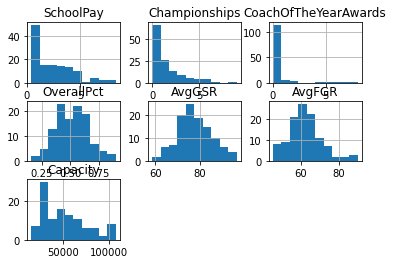

In [46]:
# Show a histogram of the numeric features in the "Coaches" dataframe
Coaches.hist()

In [47]:
# Who are the highest paid coaches?
Coaches.sort_values(by = ["SchoolPay"], ascending = False).head(10)

,School,Conference,Coach,SchoolPay,Championships,CoachOfTheYearAwards,OverallPct,AvgGSR,AvgFGR,Capacity
2,Alabama,SEC,Nick Saban,8307000.0,6,2,0.899818,65.311111,49.766667,100077.0
82,Ohio State,Big Ten,Urban Meyer,7600000.0,6,0,0.866727,69.200000,47.000000,102780.0
62,Michigan,Big Ten,Jim Harbaugh,7504000.0,4,0,0.627364,78.760000,60.240000,107601.0
105,Texas A&M,SEC,Jimbo Fisher,7500000.0,0,0,0.668909,71.800000,58.000000,102733.0
10,Auburn,SEC,Gus Malzahn,6700000.0,2,4,0.641455,75.400000,62.400000,87451.0
36,Georgia,SEC,Kirby Smart,6603600.0,2,0,0.737364,69.150000,60.037500,92746.0
23,Clemson,ACC,Dabo Swinney,6205000.0,7,7,0.829636,84.800000,66.200000,81500.0
31,Florida,SEC,Dan Mullen,6070000.0,6,0,0.633364,72.950000,54.125000,88548.0
104,Texas,Big 12,Tom Herman,5500000.0,3,0,0.563818,75.177778,58.511111,100119.0
84,Oklahoma State,Big 12,Mike Gundy,5000000.0,1,2,0.716182,58.600000,45.400000,60218.0


In [48]:
# Who are the lowest paid coaches?
Coaches.sort_values(by = ["SchoolPay"], ascending = True).head(10)

,School,Conference,Coach,SchoolPay,Championships,CoachOfTheYearAwards,OverallPct,AvgGSR,AvgFGR,Capacity
53,Louisiana-Monroe,Sun Belt,Matt Viator,390000.0,0,0,0.357727,NaN,NaN,30427.0
24,Coastal Carolina,Sun Belt,Joe Moglia,400000.0,1,0,0.500250,78.0,61.6,20000.0
1,Akron,MAC,Terry Bowden,411000.0,0,0,0.283182,74.0,64.0,30000.0
74,New Mexico State,Ind.,Doug Martin,419640.0,0,0,0.258818,75.4,57.8,30343.0
40,Hawaii,Mt. West,Nick Rolovich,425004.0,1,0,0.417455,76.0,58.0,NaN
11,Ball State,MAC,Mike Neu,435689.0,1,0,0.462364,74.4,62.4,22500.0
15,Bowling Green,MAC,Mike Jinks,437228.0,2,0,NaN,78.8,66.6,24000.0
48,Kent State,MAC,Sean Lewis,440000.0,0,0,0.387000,77.2,59.0,25000.0
17,Buffalo,MAC,Lance Leipold,455500.0,0,0,0.462727,77.2,64.2,29013.0
30,Eastern Michigan,MAC,Chris Creighton,460000.0,0,0,0.321727,70.2,51.6,30200.0


In [49]:
# Show a correlation matrix of the numeric features of the "Coaches" dataframe
Coaches.corr()

,SchoolPay,Championships,CoachOfTheYearAwards,OverallPct,AvgGSR,AvgFGR,Capacity
SchoolPay,1.000000,0.407021,0.301439,0.549012,-0.003732,-0.052572,0.862128
Championships,0.407021,1.000000,0.097169,0.599991,-0.106479,-0.149064,0.306135
CoachOfTheYearAwards,0.301439,0.097169,1.000000,0.277830,0.133077,0.153772,0.343585
OverallPct,0.549012,0.599991,0.277830,1.000000,-0.007753,-0.027738,0.472392
AvgGSR,-0.003732,-0.106479,0.133077,-0.007753,1.000000,0.789864,-0.054209
AvgFGR,-0.052572,-0.149064,0.153772,-0.027738,0.789864,1.000000,-0.111407
Capacity,0.862128,0.306135,0.343585,0.472392,-0.054209,-0.111407,1.000000


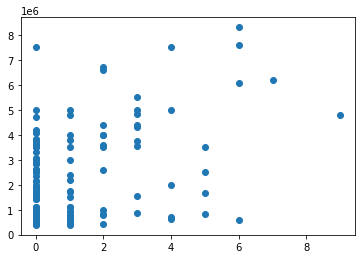

In [50]:
# Show a scatter plot of "SchoolPay" and "Championships"
plt.scatter(x = Coaches.Championships, y = Coaches.SchoolPay)
plt.show()

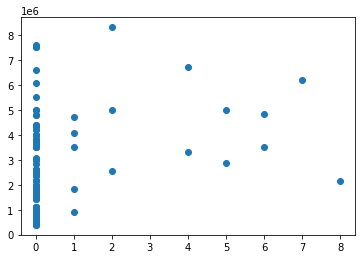

In [52]:
# Show a scatter plot of "SchoolPay" and "CoachOfTheYearAwards"
plt.scatter(x = Coaches.CoachOfTheYearAwards, y = Coaches.SchoolPay)
plt.show()

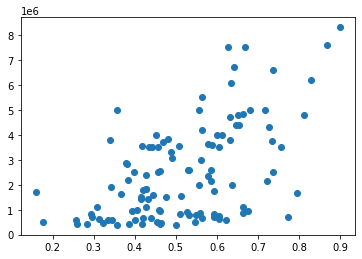

In [55]:
# Show a scatterplot of "SchoolPay" and "OverallPct"
plt.scatter(x = Coaches.OverallPct, y = Coaches.SchoolPay)
plt.show()

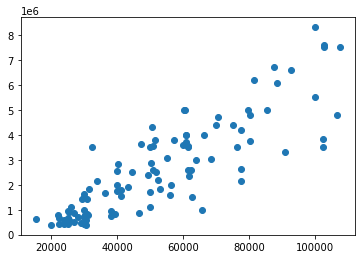

In [54]:
# Show a scatter plot of "SchoolPay" and "Capacity"
plt.scatter(x = Coaches.Capacity, y = Coaches.SchoolPay)
plt.show()

<p>&nbsp;</p>

<font size = "5">

Here are some of my observations from exploring the data. The "SchoolPay" variable ranges from 390K up to 8.3M. A lot of that variance is explained by the "Capacity" variable. I think that makes sense because larger stadiums bring in more revenue which bodes well for paying a coach more money. The "Championships", "CoachOfTheYearAwards", and "OverallPct" variables are also positively correlated with the "SchoolPay" variable but not as much. One thing that I was surprised about was that the "Championships" variable and the "CoachOfTheYearAwards" variable are not correlated with eachother. I was not expecting there to be a high correlation but I was atleast expecting there to be some correlation. Another thing I was surprised about was that the "GSR" and "FGR" variables did not have much of a correlation with anything other than a small correlation with the "CoachOfTheYearAwards". 

<p>&nbsp;</p>

## **Regression Model**

<p>&nbsp;</p>

<font size = "5">

In [71]:
# Replace missing values with the mean
Coaches = Coaches.fillna(Coaches.mean())

C:\Users\lilgi\AppData\Local\Temp/ipykernel_5468/2576952872.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Coaches = Coaches.fillna(Coaches.mean())


In [72]:
# Split the data into 2/3 train data and 1/3 test data
np.random.seed(42)
Coaches["runiform"] = uniform.rvs(loc = 0, scale = 1, size = len(Coaches))
Train = Coaches[Coaches["runiform"] >= 0.33]
Test = Coaches[Coaches["runiform"] < 0.33]

In [73]:
# Check the training dataframe
print(Train.shape)
Train.head()

(77, 11)


,School,Conference,Coach,SchoolPay,Championships,CoachOfTheYearAwards,OverallPct,AvgGSR,AvgFGR,Capacity,runiform
0,Air Force,Mt. West,Troy Calhoun,885000.0,0,0,0.558909,82.800000,62.262681,46692.000000,0.374540
1,Akron,MAC,Terry Bowden,411000.0,0,0,0.283182,74.000000,64.000000,30000.000000,0.950714
2,Alabama,SEC,Nick Saban,8307000.0,6,2,0.899818,65.311111,49.766667,100077.000000,0.731994
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,0,1,0.517578,71.800000,52.000000,51531.145455,0.598658
7,Arkansas,SEC,Chad Morris,3500000.0,5,0,0.441455,70.200000,51.400000,76212.000000,0.866176


In [74]:
# Check the testing dataframe
print(Test.shape)
Test.head()

(52, 11)


,School,Conference,Coach,SchoolPay,Championships,CoachOfTheYearAwards,OverallPct,AvgGSR,AvgFGR,Capacity,runiform
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,4,0,0.773571,75.000000,65.800000,30000.0,0.156019
5,Arizona,Pac-12,Kevin Sumlin,1600000.0,0,0,0.444636,76.466667,59.466667,56029.0,0.155995
6,Arizona State,Pac-12,Herm Edwards,2000000.0,0,0,0.557273,77.000000,62.400000,56232.0,0.058084
10,Auburn,SEC,Gus Malzahn,6700000.0,2,4,0.641455,75.400000,62.400000,87451.0,0.020584
13,Boise State,Mt. West,Bryan Harsin,1650010.0,5,0,0.795545,87.400000,65.400000,36387.0,0.212339


In [75]:
# Fit a linear regression model
Model = smf.ols("SchoolPay ~ Championships + CoachOfTheYearAwards + OverallPct + Capacity", data = Coaches).fit()

In [76]:
# Print a summary of the regression results
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SchoolPay   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     76.53
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           1.46e-32
Time:                        22:38:35   Log-Likelihood:                -1964.0
No. Observations:                 129   AIC:                             3938.
Df Residuals:                     124   BIC:                             3952.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.915e+06   4.04e+05     -4.739      0.000   -2.71e+06   -1.11e+06
Championships         1.077e+05   6.14e+04      1.755      0.082   -1.38e+04    2.29e+05
CoachOfTheYearAwards   2.58e+04   6.74e+04      0.383      0.702   -1.08e+05    1.59e+05
OverallPct             2.11e+06   8.57e+05      2.463      0.015    4.15e+05    3.81e+06
Capacity                59.9374      4.645     12.902      0.000      50.743      69.132
==============================================================================
Omnibus:                        0.334   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.449
Skew:                          -0.111   Prob(JB):                        0.799
Kurtosis:                       2.814   Cond. No.                     5.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**What is the recommended salary for the Syracuse football coach?**

The recommended salary for the Syracuse football coach based on the model is as follows.

Salary = 101400 (Championships) - 63950 (CoachOfTheYearAwards) + 1501000 (OverallPct) + 64.17 (Capacity) - 1613000
Salary = 101400 (1) - 63950 (0) + 1501000 (0.428) + 64.17 (49250)
Salary = 101400 + 642428 + 3160373
Salary = 3904201

**What would his salary be if we were still in the Big East? What if we went to the Big Ten?**

I do not see a conference that is labeled as Big East. The average salary in the Big Ten is about 4.3M. The average salary in the ACC, which is Syracuses conference, is about 3.4M. But I do not think that changing conferences is enough by itself to justify a large change in salary. The stadium size doesnt change so the revenue coming in doesnt change, atleast not right away. Overtime, I think a Big Ten school can recruit better players and thus win more games, which could lead to a bigger salary.

**What effect does graduation rate have on the projected salary?**

I did not include graduation rate in my model because there was no correlation with the dependent variable
as found during exploratory data analysis. The graduation rate likely does not have an affect on projected
salary.

**What schools did we drop from our data and why?**

I did not drop any schools from the data. 

**How good is our model?**

The probability of the F-statistic for the model is much less than 0.05 so it is statistically significant. The "Championship" and the "CoachOfTheYearAward" features are not statistically significant but the "OverallPct" and the "Capacity" features are statistically significant. With that taken into consideration and an R-squared value of 0.712 I would say that the model is pretty good but it could still be better if more data were collected.

**What is the single biggest impact on salary size?**

The stadium capacity has the biggest impact on salary size. This is most likely due to the fact that bigger stadiums are associated with bigger schools, better teams, more ticket sales, etc. 